In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load_iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
print(load_iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [5]:
# Dataset 준비

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.7)

X_train = X_train[:, :2]
X_test = X_test[:, :2]

print('Dataset size =', len(X[:, 0]))
print("Shapes of Train features = ", X_train.shape)
print("Shapes of Test feature = ", X_test.shape)
print('Feature dimension = ', len(X[0, :]))
print('Train : Test = {0} : {1}'.format(len(X_train)/len(X), len(X_test)/len(X)))

Dataset size = 150
Shapes of Train features =  (105, 2)
Shapes of Test feature =  (45, 2)
Feature dimension =  4
Train : Test = 0.7 : 0.3


In [6]:
# 로지스틱회귀에 의한 훈련

log_reg = LogisticRegression(random_state = 0).fit(X_train, y_train)
print('weights = ', log_reg.coef_)
print('bias    = ', log_reg.intercept_)

weights =  [[-2.45558519  1.99419486]
 [ 0.49488266 -1.34235569]
 [ 1.96070254 -0.65183917]]
bias    =  [ 7.60192255  1.68056527 -9.28248782]


In [7]:
# 성능평가

print("Training set performance : ",log_reg.score(X_train, y_train))
print("Test set performance : ", log_reg.score(X_test, y_test))

Training set performance :  0.8285714285714286
Test set performance :  0.8222222222222222


In [9]:
# 예측(Prediction) 관련 정보들

print('Predicted class label = ', log_reg.predict(X[0:1, :2]))
print('Probability estimates = ', log_reg.predict_proba(X[0:1, :2]))
print('Predicted confidence score = ', log_reg.decision_function(X[0:1, :2]))

Predicted class label =  [0]
Probability estimates =  [[0.90526377 0.07055046 0.02418577]]
Predicted confidence score =  [[ 2.05812008 -0.4937781  -1.56434198]]


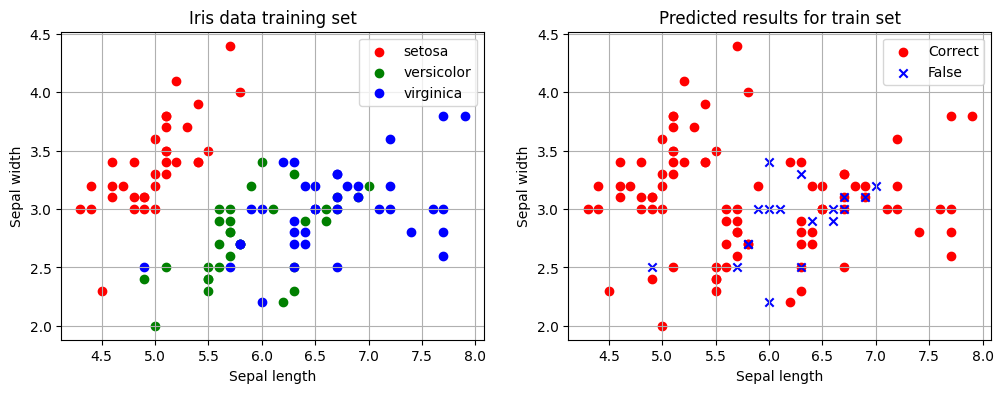

In [13]:
# 데이터 시각화 하기 (1) - Training dataset

import matplotlib.pyplot as plt
import numpy as np

y_train_pred = log_reg.predict(X_train)
correct_train_index = y_train_pred == y_train
false_train_index = y_train_pred != y_train

y_test_pred = log_reg.predict(X_test)
correct_test_index = y_test_pred == y_test
false_test_index = y_test_pred != y_test

plt.rcParams["figure.figsize"] = (12, 4)
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = 'r', label = 'setosa')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = 'g', label = 'versicolor')
plt.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = 'b', label = 'virginica')
plt.legend(), plt.grid(), plt.xlabel('Sepal length'), plt.ylabel('Sepal width')
plt.title('Iris data training set')

plt.subplot(1, 2, 2)
plt.scatter(X_train[correct_train_index, 0], X_train[correct_train_index, 1], c = 'r', marker = 'o', label = 'Correct')
plt.scatter(X_train[false_train_index, 0], X_train[false_train_index, 1], c = 'b', maker = 'x', label = 'False')
plt.legend(), plt.grid(), plt.xlabel('Sepal length'), plt.ylabel('Sepal width')
plt.title('Predicted results for train set')

plt.show()



In [14]:
# 성능평가

print("Training set performance : ",log_reg.score(X_train, y_train))
print("Test set performance : ", log_reg.score(X_test, y_test))

Training set performance :  0.8285714285714286
Test set performance :  0.8222222222222222


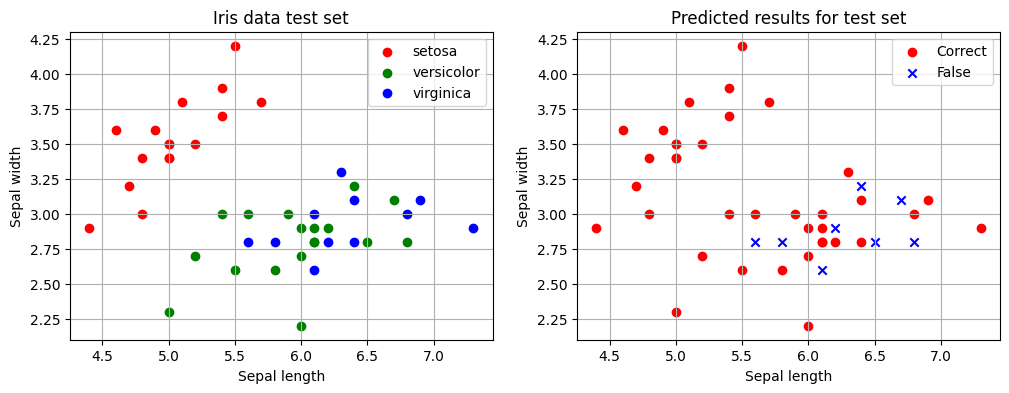

In [16]:
# 데이터 시각화 하기 (2) - Training dataset

y_train_pred = log_reg.predict(X_train)
correct_train_index = y_train_pred == y_train
false_train_index = y_train_pred != y_train

y_test_pred = log_reg.predict(X_test)
correct_test_index = y_test_pred == y_test
false_test_index = y_test_pred != y_test

plt.rcParams["figure.figsize"] = (12, 4)

plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c = 'r', label = 'setosa')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c = 'g', label = 'versicolor')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], c = 'b', label = 'virginica')
plt.xlabel('Sepal length'), plt.ylabel('Sepal width'), plt.legend(), plt.grid(), plt.title('Iris data test set')

plt.subplot(1, 2, 2)
plt.scatter(X_test[correct_test_index, 0], X_test[correct_test_index, 1], c = 'r', marker = 'o', label = 'Correct')
plt.scatter(X_test[false_test_index, 0], X_test[false_test_index, 1], c = 'b', marker = 'x', label = 'False')
plt.xlabel('Sepal length'), plt.ylabel('Sepal width'), plt.legend(), plt.grid(), plt.title('Predicted results for test set')

plt.show()

In [17]:
# 성능평가

print("Training set performance : ",log_reg.score(X_train, y_train))
print("Test set performance : ", log_reg.score(X_test, y_test))

Training set performance :  0.8285714285714286
Test set performance :  0.8222222222222222
